# Import packages

In [2]:
# you need to install mysql-connector-python using "pip install mysql-connector-python" in a terminal in advance.
import pandas as pd
import mysql.connector
from mysql.connector import Error

# Reading the data and import it as a dataframe.

In [3]:
data = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/harvest_test.csv")
data.head(5)

,project_farmer_crop_info_id,N_block,treatment,location,N_row,hotband,size,param_value,collected_date
0,1,1,T1,N,C,Yes,XL (lbs/ac),38689,21-04-21 12:00:47
1,1,1,T1,N,C,Yes,L (lbs/ac),16600,21-04-22 12:00:48
2,1,1,T1,N,C,Yes,M (lbs/ac),3041,21-04-23 12:00:49
3,1,1,T1,N,C,Yes,Cull (lbs/ac),5980,21-04-24 12:00:50
4,1,1,T1,N,C,Yes,TMY (lbs/ac),58331,21-04-25 12:00:51


# Connect to the database (DB)

In [6]:
try:
    connection = mysql.connector.connect(host='localhost',
                                          user='root',
                                          password='Mehran1284@295')   # create the connection   
    if connection.is_connected():
        cur = connection.cursor()
        cur.execute("CREATE DATABASE if not exists DB")
        print("Database is created")

except Error as e:
    print("Error while connecting to MySQL", e)

cur.execute("use DB")

Database is created


# If the database is already there, you can directly connect to it by this.

    connection = mysql.connector.connect(host='localhost',
                                          database='sakila',
                                          user='root',
                                          password='Mehran1284@295')   # create the connection   
    cur = connection.cursor()


# Create three tables, project_farmer_crop_info, soil, harvest.

In [4]:
cur.execute("""create table if not exists project_farmer_crop_info (
id int auto_increment primary key, 
project varchar(20) not null,
grower varchar(20) not null,
location varchar(20) not null,
season text not null,
crop text not null
);""")

In [10]:
cur.execute("""create table if not exists soil (
id int auto_increment, 
project_farmer_crop_info_id int,
treatment text,
N_row int,
position text,
Param_value double,
collected_date date, 
primary key(id),
foreign key(project_farmer_crop_info_id) references project_farmer_crop_info(id)
);""")

In [9]:
cur.execute("""create table if not exists harvest (
id int auto_increment,
project_farmer_crop_info_id int,
N_block int, 
treatment text,
location text,
N_row text,
hotband text,
size text,
param_value int,
primary key(id),
collected_date timestamp, foreign key(project_farmer_crop_info_id) references project_farmer_crop_info(id)
);""")

# List of the tables in the database

In [10]:
cur.execute("SHOW TABLES")

for table_name in cur:
   print(table_name[0])

harvest
project_farmer_crop_info


# Insert data

In [11]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', database='db', user='root', password='Mehran1284@295')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        #loop through the data frame
        for i, row in data.iterrows():
            #here %S means string values 
            sql = "INSERT INTO db.harvest VALUES (default,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            print(tuple(row))
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('db',)
(1, 1, 'T1', 'N', 'C', 'Yes', 'XL (lbs/ac)', 38689, '21-04-21 12:00:47')
Record inserted
(1, 1, 'T1', 'N', 'C', 'Yes', 'L (lbs/ac)', 16600, '21-04-22 12:00:48')
Record inserted
(1, 1, 'T1', 'N', 'C', 'Yes', 'M (lbs/ac)', 3041, '21-04-23 12:00:49')
Record inserted
(1, 1, 'T1', 'N', 'C', 'Yes', 'Cull (lbs/ac)', 5980, '21-04-24 12:00:50')
Record inserted
(1, 1, 'T1', 'N', 'C', 'Yes', 'TMY (lbs/ac)', 58331, '21-04-25 12:00:51')
Record inserted
(1, 1, 'T1', 'N', 'C', 'Yes', 'Total (lbs/ac)', 64310, '21-04-26 12:00:52')
Record inserted


# Making a query

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,T1,N,C,Yes,XL (lbs/ac),38689,2021-04-21 12:00:47
1,2,1,1,T1,N,C,Yes,L (lbs/ac),16600,2021-04-22 12:00:48
2,3,1,1,T1,N,C,Yes,M (lbs/ac),3041,2021-04-23 12:00:49
3,4,1,1,T1,N,C,Yes,Cull (lbs/ac),5980,2021-04-24 12:00:50
4,5,1,1,T1,N,C,Yes,TMY (lbs/ac),58331,2021-04-25 12:00:51
5,6,1,1,T1,N,C,Yes,Total (lbs/ac),64310,2021-04-26 12:00:52


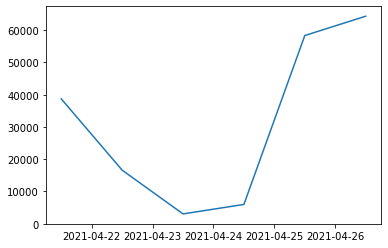

In [12]:
# Execute query
sql = "SELECT * FROM db.harvest"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()

df_result = pd.DataFrame(result)
df_result

import matplotlib.pyplot as plt
plt.plot(df_result[9], df_result[8])
df_result


# Another example:
Here, we first create a database (employee). Then, we create a table (employee_data).
We import a CSV (us-500.csv) file and insert it into the table, employee_data.
Then, we make a query.

# Reading the data and import it as a dataframe.

In [16]:
data = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/us-500.csv")
data.head(5)

,first_name,last_name,company_name,address,city,county,state,zip,phone1,phone2,email,web,age,weight,collected_date
0,James,Butt,"Benton, John B Jr",6649 N Blue Gum St,New Orleans,Orleans,LA,70116,504-621-8927,504-845-1427,jbutt@gmail.com,http://www.bentonjohnbjr.com,35,5.2,22-01-01 12:00:00
1,Josephine,Darakjy,"Chanay, Jeffrey A Esq",4 B Blue Ridge Blvd,Brighton,Livingston,MI,48116,810-292-9388,810-374-9840,josephine_darakjy@darakjy.org,http://www.chanayjeffreyaesq.com,45,5.3,22-01-01 12:00:01
2,Art,Venere,"Chemel, James L Cpa",8 W Cerritos Ave #54,Bridgeport,Gloucester,NJ,8014,856-636-8749,856-264-4130,art@venere.org,http://www.chemeljameslcpa.com,25,5.4,22-01-01 12:00:02
3,Lenna,Paprocki,Feltz Printing Service,639 Main St,Anchorage,Anchorage,AK,99501,907-385-4412,907-921-2010,lpaprocki@hotmail.com,http://www.feltzprintingservice.com,25,5.5,22-01-01 12:00:03
4,Donette,Foller,Printing Dimensions,34 Center St,Hamilton,Butler,OH,45011,513-570-1893,513-549-4561,donette.foller@cox.net,http://www.printingdimensions.com,20,5.6,22-01-01 12:00:04


# Connect to the database (DB)

In [17]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', user='root',  
                        password='Mehran1284@295')#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE employee")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Error while connecting to MySQL 1007 (HY000): Can't create database 'employee'; database exists


In [6]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', database='employee', user='root', password='Mehran1284@295')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS employee_data;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE employee_data(first_name varchar(255),last_name varchar(255),company_name varchar(255),address varchar(255),city varchar(255),county varchar(255),state varchar(255),zip int,phone1 varchar(255),phone2 varchar(255),email varchar(255),web varchar(255), age int, weight double, collected_date timestamp)")
        print("Table is created....")
        #loop through the data frame
        for i,row in data.iterrows():
            #here %S means string values 
            sql = "INSERT INTO employee.employee_data VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s, %s, %s, %s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('employee',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Rec

In [53]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', database='employee', user='root', password='Mehran1284@295')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS employee_data;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE employee_data(first_name varchar(255),last_name varchar(255),company_name varchar(255),address varchar(255),city varchar(255),county varchar(255),state varchar(255),zip int,phone1 varchar(255),phone2 varchar(255),email varchar(255),web varchar(255))")
        print("Table is created....")
        #loop through the data frame
        for i,row in data.iterrows():
            #here %S means string values 
            sql = "INSERT INTO employee.employee_data VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('employee',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Rec

Useful links:https://www.projectpro.io/recipes/connect-mysql-python-and-import-csv-file-into-mysql-and-create-table#mcetoc_1g2pojq7vg

# Making a query

,0,1,2
0,35,5.2,2022-01-01 12:00:00
1,45,5.3,2022-01-01 12:00:01
2,25,5.4,2022-01-01 12:00:02
3,25,5.5,2022-01-01 12:00:03
4,20,5.6,2022-01-01 12:00:04
...,...,...,...
495,10,54.7,2022-01-01 12:00:54
496,10,54.8,2022-01-01 12:00:55
497,10,54.9,2022-01-01 12:00:56
498,10,55.0,2022-01-01 12:00:57


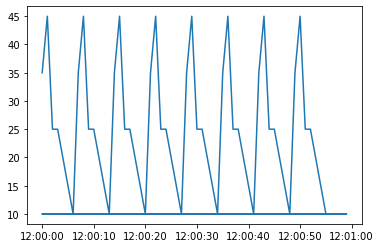

In [18]:
# Execute query
sql = "SELECT age, weight, collected_date FROM employee.employee_data"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()

df_result = pd.DataFrame(result)
df_result

import matplotlib.pyplot as plt
plt.plot(df_result[2], df_result[0])
df_result